# Homework No. 2

The following jupyter notebook contains the results of the second homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib

The dataset that is used was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Task

The first task was to analyse the different data types in the dataset. 

In [2]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.drop(columns=['Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   NumDealsPurchases    2240 non-null   int64 
 9   NumWebPurchases      2240 non-null   int64 
 10  NumCatalogPurchases  2240 non-null   int64 
 11  NumStorePurchases    2240 non-null   int64 
 12  NumWebVisitsMonth    2240 non-null   int64 
 13  Country              2240 non-null   object
dtypes: int64(9), object(5)
memory usage: 245.1+ KB


As briefly mentioned in Homework No. 1, it can be seen that most of the data is either of type int or string/object. Currently, there are no null values in the dataset. 

In [3]:
df = df.rename(columns={" Income ": "Income"})
print("Income data type before conversion: " + str(df.dtypes['Income']))
df["Income"] = df["Income"].replace("[$,]", "", regex=True).astype(float)
print("Income data type after conversion: " + str(df.dtypes['Income']))
print("Number of null values: " + str(df["Income"].isnull().sum()))

Income data type before conversion: object
Income data type after conversion: float64
Number of null values: 24


After type conversion of column "Income", null-values occured. There are different ways to handle that, one would be to remove them as in Homework 1: "df.dropna()". 

## 2. Task

For the second task, statistics about several data series were generated, analyzed and visualized. The focus was hereby on the columns "NumWebPurchases", "NumStorePurchases" and "NumCatalogPurchases". 

In [4]:
df["NumWebPurchases"].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

Here you can see several information about the number of web purchases. Among other things, there is the mean, standard deviation, different quartiles or for instance the maximum and minimum value.

The following code is going to visualize these information in a bar plot. 

<AxesSubplot:title={'center':'Statistics Number Web Purchases'}, ylabel='Number of Purchases'>

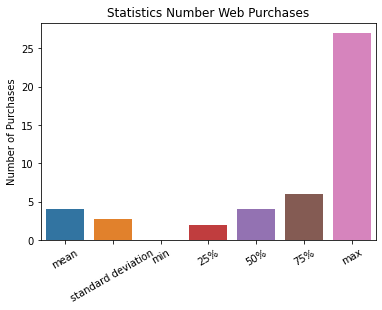

In [5]:
web_data = list(df["NumWebPurchases"].describe())
web_data.pop(0)
desc = ["mean", "standard deviation", "min", "25%", "50%", "75%", "max"]
plt.title("Statistics Number Web Purchases")
plt.xticks(rotation=30)
plt.ylabel("Number of Purchases")
sns.barplot(x= desc, y=web_data)

To compare the statstics of different sale channels, the following boxplot visualizes them:

Text(0, 0.5, 'Number of Purchases')

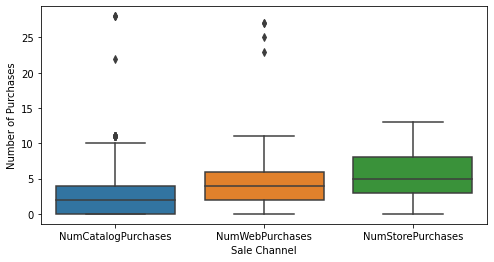

In [6]:
df2 = pd.melt(df[["NumCatalogPurchases","NumWebPurchases", "NumStorePurchases"]])
plt.figure(figsize = (8,4))
sns.boxplot(x=df2.variable, y=df2.value)
plt.xlabel("Sale Channel")
plt.ylabel("Number of Purchases")

By that, we are able to compare for instance the median, quartiles, outliers, etc. of the different sale channels. 

## 3. Task

For task 3, different basic visualizations of the dataset were created. The first visualization is a distribution plot about the birthyear of the customers. 

Text(0.5, 1.0, 'Distribution Customers Birthyear')

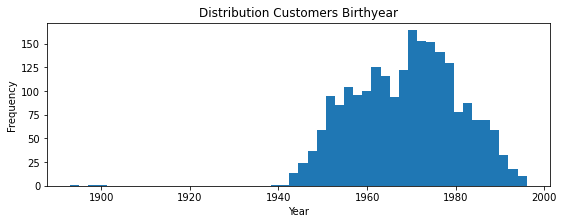

In [7]:
plt.figure(figsize = (9,3))
plt.hist(df.Year_Birth, bins = 50)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution Customers Birthyear")

Besides that, the following pie chart focuses on visualizing the customers family size. In particular, this refers to the amount of kids they have.

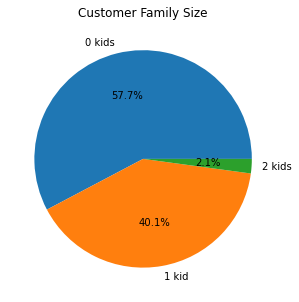

In [8]:
plt.figure(figsize=(5,5))
kids = df["Kidhome"].value_counts()
plt.title("Customer Family Size")
plt.pie(kids, labels =["0 kids","1 kid","2 kids"], autopct='%.1f%%');

Other visualizations were made about the correlations between the different sale channels. The following heatmap shows the corresponding results.

Further details can be seen in the two scatterplots, which compare "NumbCatalogPurchases" with either "NumWebPurchases" or "NumStorePurchases".

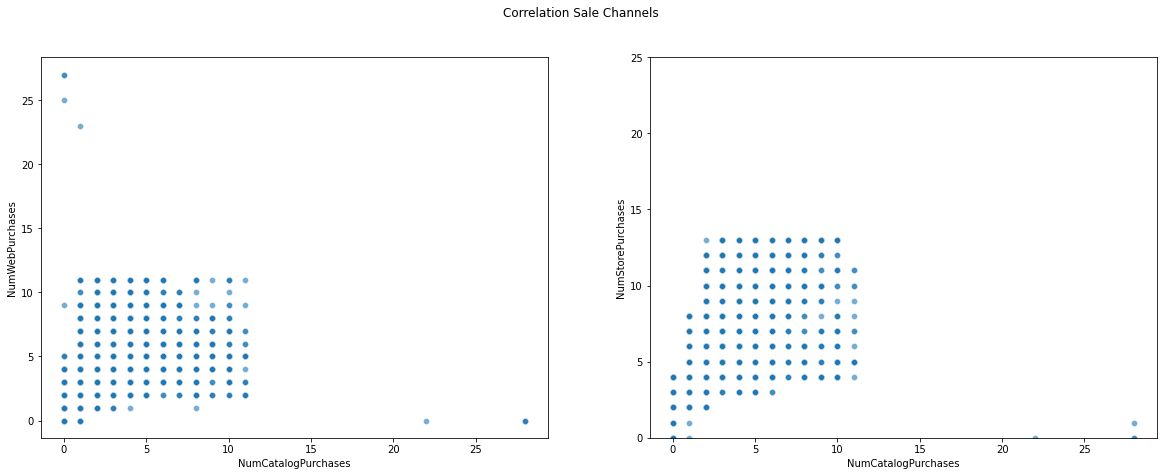

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
fig.suptitle('Correlation Sale Channels')
plt.ylim(0, 25)
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumStorePurchases', ax=ax[1], alpha=0.6);
sns.scatterplot(data=df, x='NumCatalogPurchases', y='NumWebPurchases', ax=ax[0], alpha=0.6);

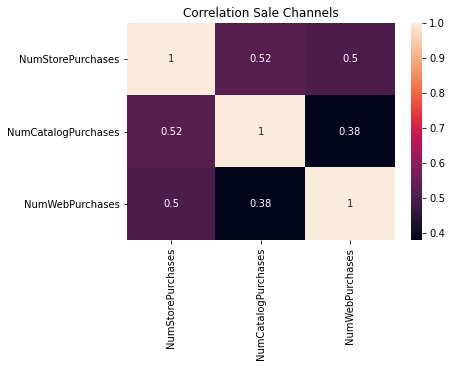

In [10]:
corr = df[["NumStorePurchases", "NumCatalogPurchases", "NumWebPurchases"]].corr()
f = sns.heatmap(corr, annot=True)
plt.title("Correlation Sale Channels");

## 4. Task

In the last task, the dataset was analyzed for periodicity / seasonality. Because of the fact that the dataset does not really contain timeseries data, such an analysis is not that easy. The only time related data that exist, is the registration date of the customer. 

In [11]:
df["Date"] = pd.to_datetime(df['Dt_Customer'])
df.index = pd.to_datetime(df['Date'],format='%m/%d/%y %I:%M%p')

In [12]:
df2 = df.groupby(pd.Grouper(freq='M')).size()
df2 = df2.to_frame().reset_index()
df2 = df2.rename(columns={0: "count"})

In [13]:
Dates = list(df2["Date"])
da = []
for i in Dates:
  date = i.date().strftime('%Y-%m')
  da.append(date)
dec = list(df2["count"])

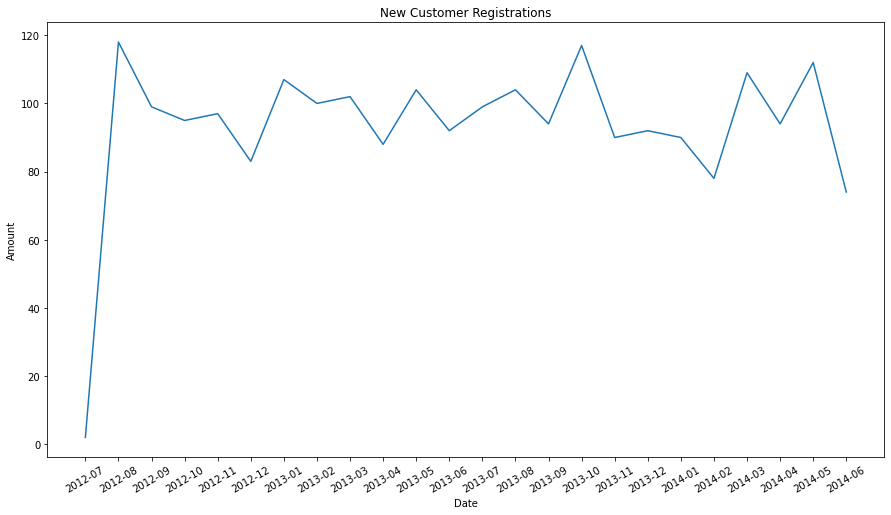

In [14]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=30)
sns.lineplot(x = da, y = dec)
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("New Customer Registrations");

The plot above visualizes the amount of registrations per month from July 2012 to June 2014. To clearly demonstrate the data, a monthly representation was chosen. By analyzing the line chart, it can be seen that there is no obvious pattern for periodicity. However, this is just an assumption and further methods should be applied to prove that. 

The following visualization will give more insights about how the amount of new customer registrations changes during the year 2013. 

In [15]:
df3 = df[(df['Date'] >= "2013-01-01") & (df['Date'] <= "2013-12-31")]
df3.index = pd.to_datetime(df3['Date'],format='%m/%d/%y %I:%M%p')
dt = df3.groupby(by=[df3.index.month]).size()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={0: "count"})
dec = list(dt["count"])
da = list(dt.Date)

In [16]:
import calendar
months = list(calendar.month_name)
months.pop(0);

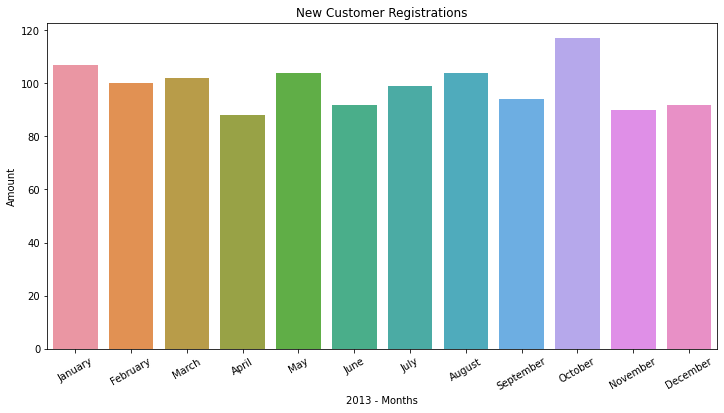

In [17]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=30)
sns.barplot(x = months, y = dec)
plt.xlabel("2013 - Months")
plt.ylabel("Amount")
plt.title("New Customer Registrations");

The bar plot shows that the amount of registrations for new customers slightly differs from month to month (2013). Nevertheless, there is no obvious periodicity recognisable. The following line plot will use a different y-scaling to make the changes more clear. 

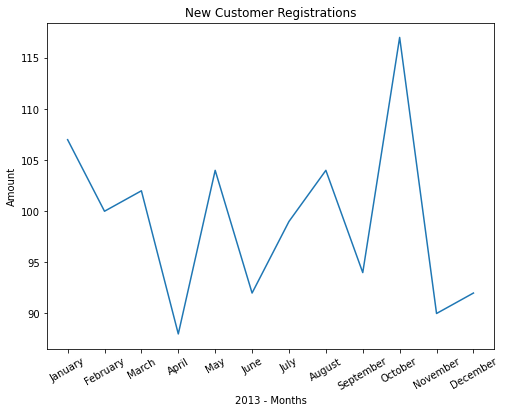

In [18]:
plt.figure(figsize = (8,6))
plt.xticks(rotation=30)
sns.lineplot(x = months, y = dec)
plt.xlabel("2013 - Months")
plt.ylabel("Amount")
plt.title("New Customer Registrations");

Besides the monthly representation, the following bar and line plot visualize how the amount of new customer registrations changes during a month. For that purpose, the data of 2013 was grouped. 

In [19]:
dt = df3.groupby(by=[df3.index.day]).size()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={0: "count"})
dec = list(dt["count"])
da = list(dt.Date)

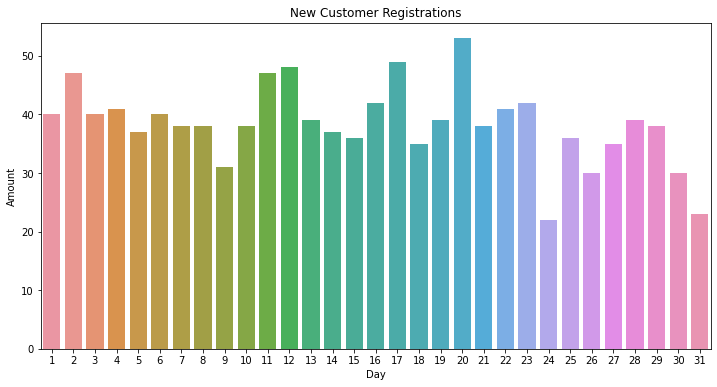

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = da, y = dec)
plt.xlabel("Day")
plt.ylabel("Amount")
plt.title("New Customer Registrations");

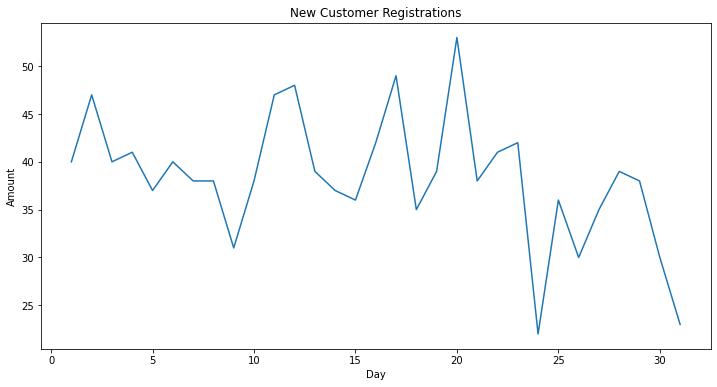

In [21]:
plt.figure(figsize = (12,6))
sns.lineplot(x = da, y = dec)
plt.xlabel("Day")
plt.ylabel("Amount")
plt.title("New Customer Registrations");

Similar to the monthly representation, no periodicity is visible. However, according to the results it can be said that the amount of new customer registrations, is in the mid of the month at the maximum. By the end of the month, the amount of registrations goes down. This can for instance be explained by the fact, that not every month has 31 days and therefore less data can be grouped.

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just